In [54]:
from ucimlrepo import fetch_ucirepo 
from sklearn.cluster import KMeans
import numpy as np
from features.columns import CompositeTranformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets 


In [55]:
print(X)
print(y)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

In [56]:
columns_cat = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC' , 'CALC', 'MTRANS']
columns_num = X.columns.difference(columns_cat).difference(['NObeyesdad'])


tranformer_x = CompositeTranformer( numeric_features=columns_num, categorical_features=columns_cat)

X = tranformer_x.transform(X)


transformer_y = CompositeTranformer(numeric_features=[], categorical_features=['NObeyesdad'])
y = transformer_y.transform(y)

In [45]:
kmeans = KMeans(n_clusters=7, random_state=0, n_init="auto")
kmeans.fit(X)
kmeans.labels_

array([1, 5, 6, ..., 3, 3, 3], dtype=int32)

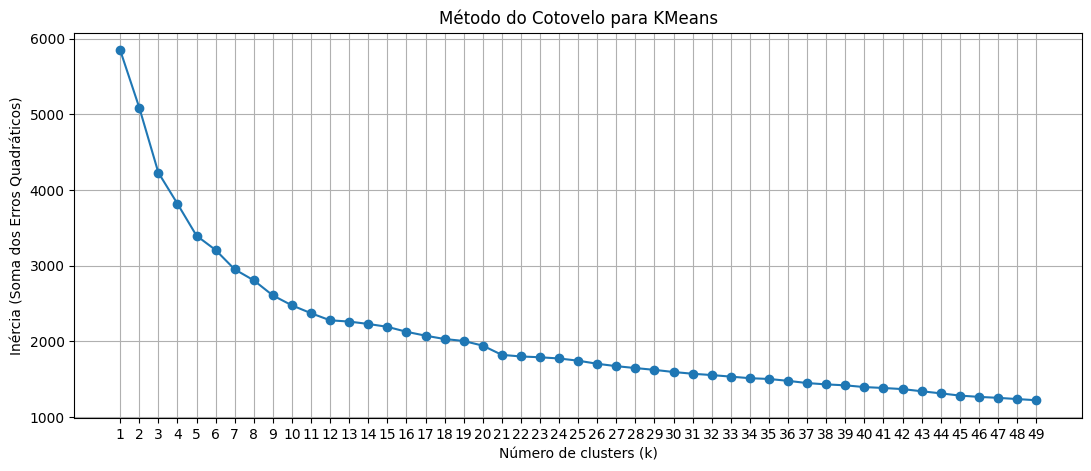

In [64]:

inertias = []
K_range = range(1, 50)

for k in K_range:
  kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
  kmeans.fit(X)
  inertias.append(kmeans.inertia_)

# Plot do cotovelo
plt.figure(figsize=(13, 5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia (Soma dos Erros Quadráticos)')
plt.title('Método do Cotovelo para KMeans')
plt.xticks(K_range)
plt.grid(True)
plt.show()